In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [68]:
#Read the CSV File of Breast Cancer Dataset
df = pd.read_csv(r"datasets\Car Evaluation\car.data")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [69]:
df.columns = ["buying" ,"maintenance" , "doors" ,"persons", "lug_boot", "safety", "class"]
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [71]:
#Data Cleaning
df.dropna()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


|Column|Attributes|
|---|---|
|buying| "vhigh" : 4 , "high" : 3, "med" : 2, "low" : 1
maintenance| "vhigh" : 4 , "high" : 3, "med" : 2, "low" : 1
doors| 2, 3, 4, "5-more" : 5
persons| 2, 4, "more" : 6
lug_boot|"small" : 1, "med" : 1, "big" : 3
safety|"high" : 3, "med" : 2, "low" : 1
class|"unacc" : 0 , "acc" :1 ,"good" : 2,"vgood":3

In [72]:
newValues = {"vhigh" : 4 , "high" : 3, "med" : 2, "low" : 1,
             "2" : 2, "3": 3, "4":4,"5more" : 5, "more" : 6 , "small" : 1, "med" : 2, "big" : 3,
             "unacc" : 0 , "acc" :1 ,"good" : 2,"vgood":3}
df.replace(newValues, inplace = True)
df

,buying,maintenance,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,2,0
1,4,4,2,2,1,3,0
2,4,4,2,2,2,1,0
3,4,4,2,2,2,2,0
4,4,4,2,2,2,3,0
...,...,...,...,...,...,...,...
1722,1,1,5,6,2,2,2
1723,1,1,5,6,2,3,3
1724,1,1,5,6,3,1,0
1725,1,1,5,6,3,2,2


0    1209
1     384
2      69
3      65
Name: class, dtype: int64


<AxesSubplot: >

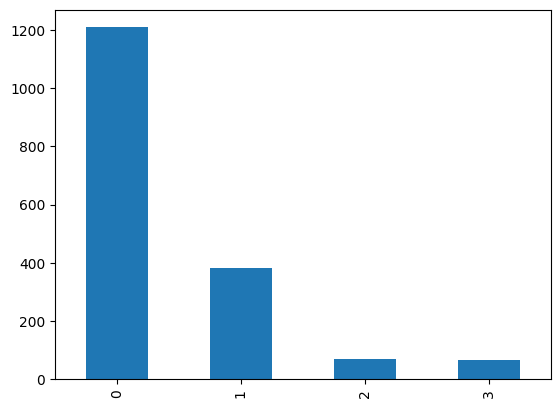

In [73]:
print(df["class"].value_counts())
plotdata = df["class"].value_counts()
plotdata.plot(kind ="bar")

|Column|Attributes|
|---|---|
class|"unacc" : 0 , "acc" :1 ,"good" : 2,"vgood":3

Based on the dataset, there are a very high number of unacceptable class of cars. We are going to use the attributes to predict the class of each car.

3    432
2    432
1    432
4    431
Name: buying, dtype: int64


<AxesSubplot: >

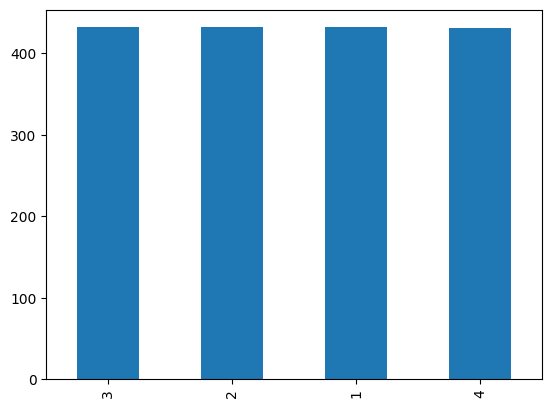

In [74]:
print(df["buying"].value_counts())
plotdata = df["buying"].value_counts()
plotdata.plot(kind ="bar")

|Column|Attributes|
|---|---|
|buying| "vhigh" : 4 , "high" : 3, "med" : 2, "low" : 1

The buying value of the cars are evenly distributed 

3    432
2    432
1    432
4    431
Name: maintenance, dtype: int64


<AxesSubplot: >

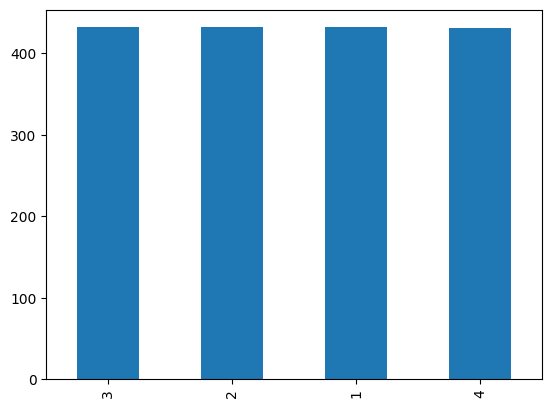

In [75]:
print(df["maintenance"].value_counts())
plotdata = df["maintenance"].value_counts()
plotdata.plot(kind ="bar")

|Column|Attributes|
|---|---|
maintenance| "vhigh" : 4 , "high" : 3, "med" : 2, "low" : 1


The distribution of maintenance cost is evenly distributed

3    432
4    432
5    432
2    431
Name: doors, dtype: int64


<AxesSubplot: >

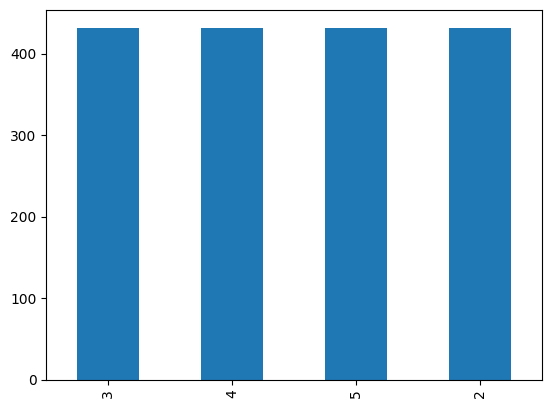

In [76]:
print(df["doors"].value_counts())
plotdata = df["doors"].value_counts()
plotdata.plot(kind ="bar")

|Column|Attributes|
|---|---|
doors| 2, 3, 4, "5-more" : 5


Number of vehicles with 2, 3 ,4 and 5 or more doors are also evenly distributed

4    576
6    576
2    575
Name: persons, dtype: int64


<AxesSubplot: >

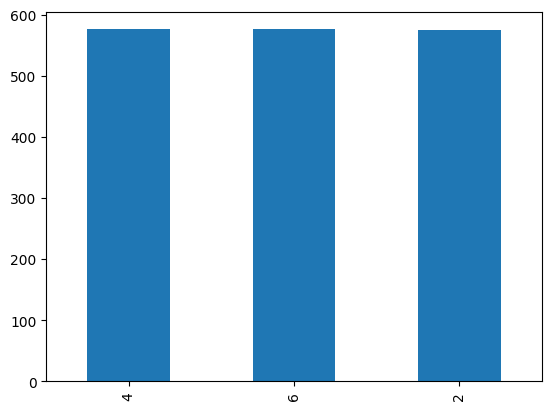

In [77]:
print(df["persons"].value_counts())
plotdata = df["persons"].value_counts()
plotdata.plot(kind ="bar")

|Column|Attributes|
|---|---|
persons| 2, 4, "more" : 6

The number of people each car vehicle can carry are also evenly distributed with 2, 4 and more

2    576
3    576
1    575
Name: lug_boot, dtype: int64


<AxesSubplot: >

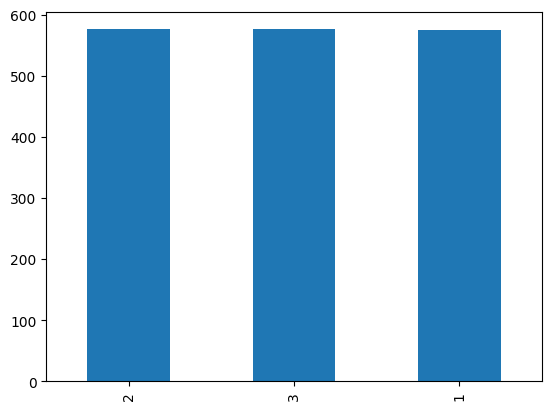

In [78]:
print(df["lug_boot"].value_counts())
plotdata = df["lug_boot"].value_counts()
plotdata.plot(kind ="bar")

|Column|Attributes|
|---|---|
lug_boot|"small" : 1, "med" : 1, "big" : 3


2    576
3    576
1    575
Name: safety, dtype: int64


<AxesSubplot: >

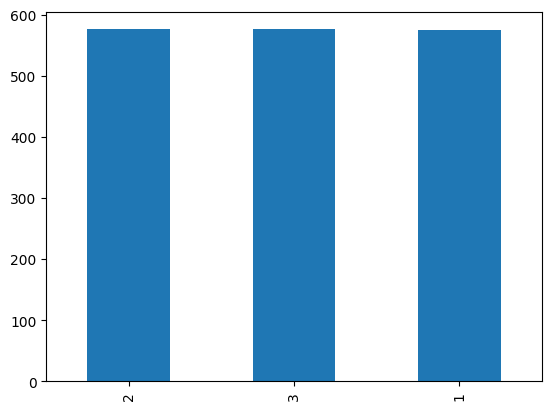

In [79]:
print(df["safety"].value_counts())
plotdata = df["safety"].value_counts()
plotdata.plot(kind ="bar")

|Column|Attributes|
|---|---|
safety|"high" : 3, "med" : 2, "low" : 1


In [80]:
df.corr()

,buying,maintenance,doors,persons,lug_boot,safety,class
buying,1.000000,-0.001043,0.001043,0.000952,0.000952,0.000952,-0.282488
maintenance,-0.001043,1.000000,0.001043,0.000952,0.000952,0.000952,-0.232128
doors,0.001043,0.001043,1.000000,-0.000952,-0.000952,-0.000952,0.065662
persons,0.000952,0.000952,-0.000952,1.000000,-0.000869,-0.000869,0.341489
lug_boot,0.000952,0.000952,-0.000952,-0.000869,1.000000,-0.000869,0.157617
safety,0.000952,0.000952,-0.000952,-0.000869,-0.000869,1.000000,0.439171
class,-0.282488,-0.232128,0.065662,0.341489,0.157617,0.439171,1.000000


<AxesSubplot: >

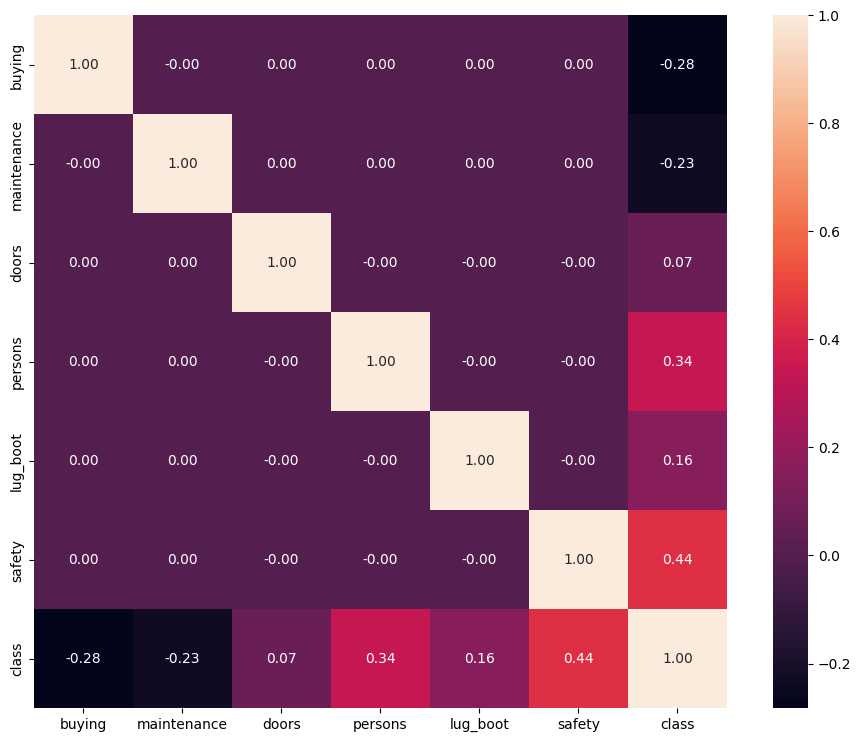

In [81]:
correlation_mat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation_mat, vmax= 1, annot = True, square = True, fmt= ".2f")

Based on the correlation matrix, we will remove negative correlated factors from the dataframe.

In [82]:
def cleanDf(argument):
    df.drop(argument,axis = 1, inplace = True)
    df.dropna()

In [83]:
cleanDf("buying")
cleanDf("maintenance")

In [84]:
df

,doors,persons,lug_boot,safety,class
0,2,2,1,2,0
1,2,2,1,3,0
2,2,2,2,1,0
3,2,2,2,2,0
4,2,2,2,3,0
...,...,...,...,...,...
1722,5,6,2,2,2
1723,5,6,2,3,3
1724,5,6,3,1,0
1725,5,6,3,2,2


In [134]:
#Extract the attributes into a list
def extract_df_col(df):
    df = df.copy()
    class_column = df.pop('class')
    df['class'] = class_column
    record_list = []
    for col in df.columns:
        record_list.append(col)
    print(record_list)
    return(record_list)


In [135]:
car_list = extract_df_col(df)
with open("datasets\Car Evaluation\cleaned_attributes.txt", "w") as output:
    output.write(str(car_list))

['doors', 'persons', 'lug_boot', 'safety', 'class']


### Creating Testing and Training Sets

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dectree = DecisionTreeClassifier()

In [88]:
y = df["class"]
x = df.drop("class", axis = 1)

In [89]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.25, random_state = 2)

print("Train set: \t", xTrain.shape,yTrain.shape)
print("Test set: \t", xTest.shape,yTest.shape)

Train set: 	 (1295, 4) (1295,)
Test set: 	 (432, 4) (432,)


### Classification Decision Tree Method

In [90]:
dectree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [91]:
dt_pred = dectree.predict(xTest)
print(dt_pred)

[0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 1 3 3 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 3 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 1 0 1 0 3 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 3 0 0 1 0 0 0 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0]


In [92]:
car_dt_df = pd.DataFrame(data = dt_pred, columns = ["class"])
car_dt_df.head(15)

,class
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,0


In [93]:
print("Classification Accuracy for Training set \t: ", dectree.score(xTrain,yTrain))
print("Classification Accuracy for Testing set \t: ", dectree.score(xTest,yTest))

Classification Accuracy for Training set 	:  0.8355212355212355
Classification Accuracy for Testing set 	:  0.8101851851851852


In [94]:
dtAccuracy = accuracy_score(yTest,dt_pred)
dtFscore = f1_score(yTest,dt_pred, average = "weighted")
print(f"The accuracy of Decision Tree is {dtAccuracy}")
print(f"The F score of Decision Tree is {dtFscore}")

The accuracy of Decision Tree is 0.8101851851851852
The F score of Decision Tree is 0.790938887826438


In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,dt_pred)
cm

array([[269,  27,   0,   1],
       [ 15,  81,   0,   4],
       [  0,  17,   0,   0],
       [  0,  18,   0,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

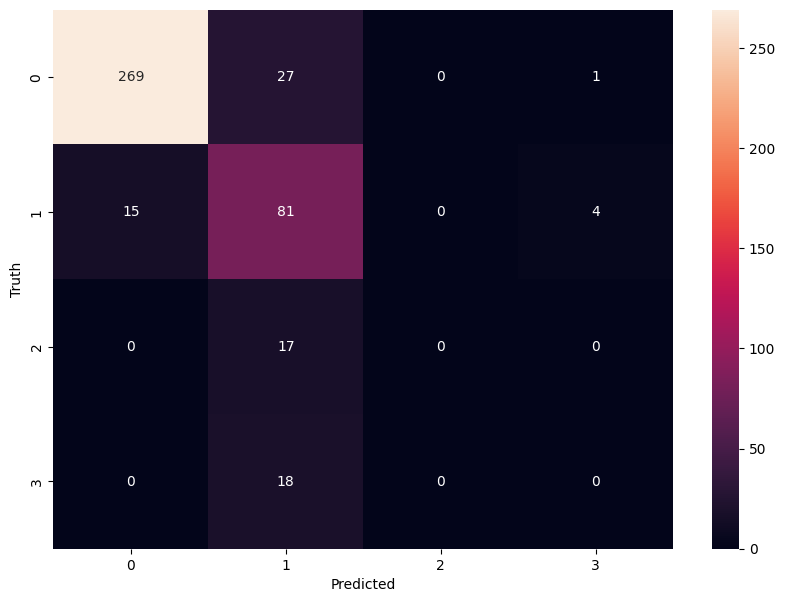

In [96]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [97]:
xTestDF = xTest.copy()
xTestDF.insert(len(xTestDF.columns), "yTest class", yTest)
xTestDF = xTestDF.reset_index(drop=True)
xTestDF.head(15)

,doors,persons,lug_boot,safety,yTest class
0,2,2,2,1,0
1,4,6,1,1,0
2,2,4,3,3,3
3,2,4,3,2,0
4,5,4,2,3,0
5,3,2,2,2,0
6,3,4,2,3,1
7,5,2,2,1,0
8,4,6,3,3,1
9,4,2,2,2,0


In [98]:
xTestDF.insert(len(xTestDF.columns), "Decision Tree", car_dt_df)
xTestDF.head(20)

,doors,persons,lug_boot,safety,yTest class,Decision Tree
0,2,2,2,1,0,0
1,4,6,1,1,0,0
2,2,4,3,3,3,1
3,2,4,3,2,0,1
4,5,4,2,3,0,1
5,3,2,2,2,0,0
6,3,4,2,3,1,1
7,5,2,2,1,0,0
8,4,6,3,3,1,1
9,4,2,2,2,0,0


### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

index : 32 
Accuracy : 0.8194444444444444


Text(0, 0.5, 'Testing Accuracy')

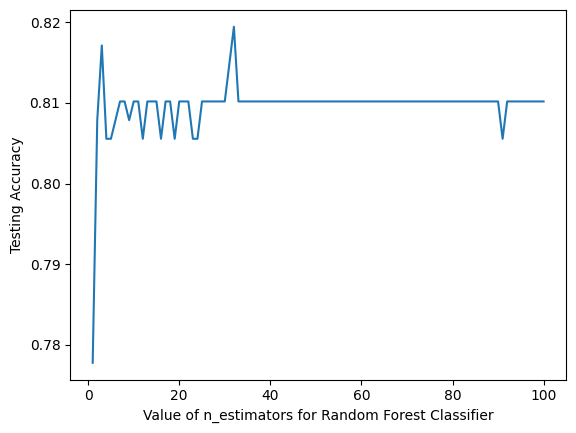

In [100]:
scores =[]
maxAccuracy = 0
maxIndex = 0
for i,k in enumerate(range(1, 101)):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(xTrain, yTrain)
    rf_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, rf_pred))

for i, x in enumerate(scores):
    if i == 0:
        maxAccuracy = x
        maxIndex = i+1
    if x > maxAccuracy:
        maxAccuracy = x
        maxIndex = i+1

print(f"index : {maxIndex} \nAccuracy : {maxAccuracy}")

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 101), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [101]:
model = RandomForestClassifier(n_estimators=maxIndex)
model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=32)

In [102]:
model.score(xTest,yTest)

0.8101851851851852

In [103]:
rf_pred = model.predict(xTest)

In [104]:
rfAccuracy = accuracy_score(yTest,rf_pred)
rfFscore = f1_score(yTest,rf_pred, average = "weighted")
print(f"The accuracy of Random Forest is {rfAccuracy}")
print(f"The F score of Random Forest is {rfFscore}")

The accuracy of Random Forest is 0.8101851851851852
The F score of Random Forest is 0.790938887826438


In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,rf_pred)
cm

array([[269,  27,   0,   1],
       [ 15,  81,   0,   4],
       [  0,  17,   0,   0],
       [  0,  18,   0,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

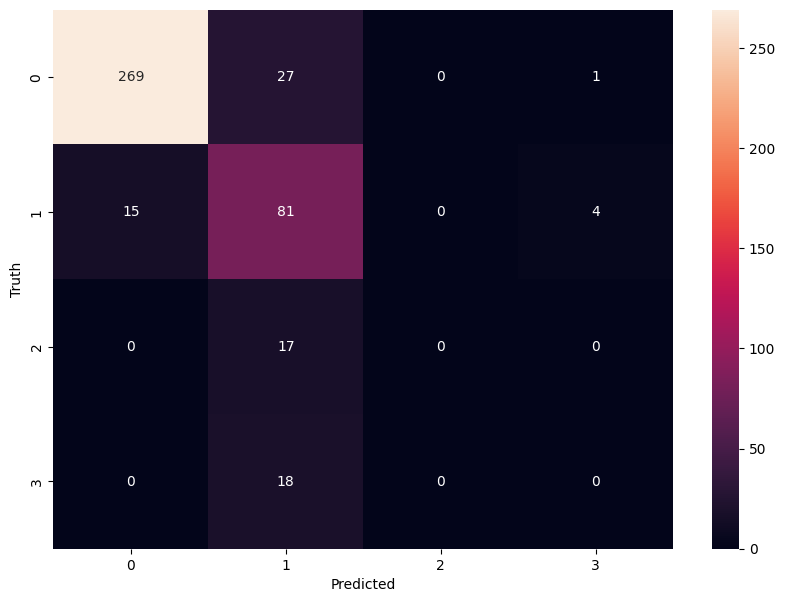

In [106]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [107]:
car_rf_df = pd.DataFrame(data = rf_pred, columns = ["class"])
car_rf_df.head(15)

,class
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,0


In [108]:
xTestDF.insert(len(xTestDF.columns), "Random Forest", car_rf_df)
xTestDF.head(20)

,doors,persons,lug_boot,safety,yTest class,Decision Tree,Random Forest
0,2,2,2,1,0,0,0
1,4,6,1,1,0,0,0
2,2,4,3,3,3,1,1
3,2,4,3,2,0,1,1
4,5,4,2,3,0,1,1
5,3,2,2,2,0,0,0
6,3,4,2,3,1,1,1
7,5,2,2,1,0,0,0
8,4,6,3,3,1,1,1
9,4,2,2,2,0,0,0


### K-Nearest-Neighbour Classification

In [109]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(xTrain,yTrain)
    knn_pred= knnClass.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,knn_pred))
    
maxKAccuracy = 0
maxKValue = 0

for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i+1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i+1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")

K value : 13 
Accuracy : 0.8194444444444444


Text(0, 0.5, 'Testing Accuracy')

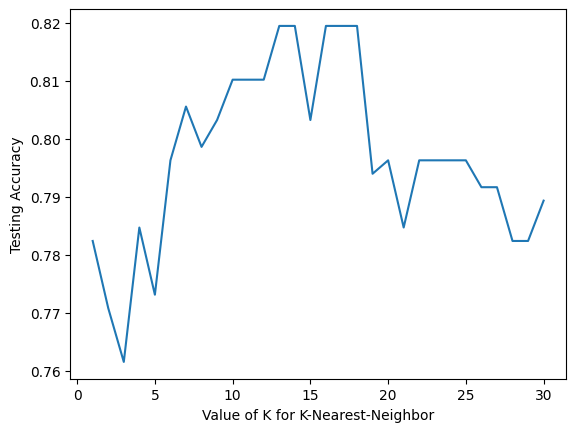

In [110]:
%matplotlib inline

plt.plot(kRange,scores)
plt.xlabel("Value of K for K-Nearest-Neighbor")
plt.ylabel("Testing Accuracy")

In [111]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=13)

Select maxKValue of nearest neighbour with the highest accuracy

In [112]:
knnPredicted = knnClass.predict(xTest)
print(knnPredicted)

[0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0]


In [113]:
knnAccuracy = accuracy_score(yTest,knnPredicted)
knnFscore = f1_score(yTest,knnPredicted,average = "weighted")
print(f"The accuracy of K-Nearest-Neighbour is {knnAccuracy}")
print(f"The F score of K-Nearest-Neighbour is {knnFscore}")

The accuracy of K-Nearest-Neighbour is 0.8194444444444444
The F score of K-Nearest-Neighbour is 0.7952947221553905


In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,knnPredicted)
cm

array([[269,  28,   0,   0],
       [ 15,  85,   0,   0],
       [  0,  17,   0,   0],
       [  0,  18,   0,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

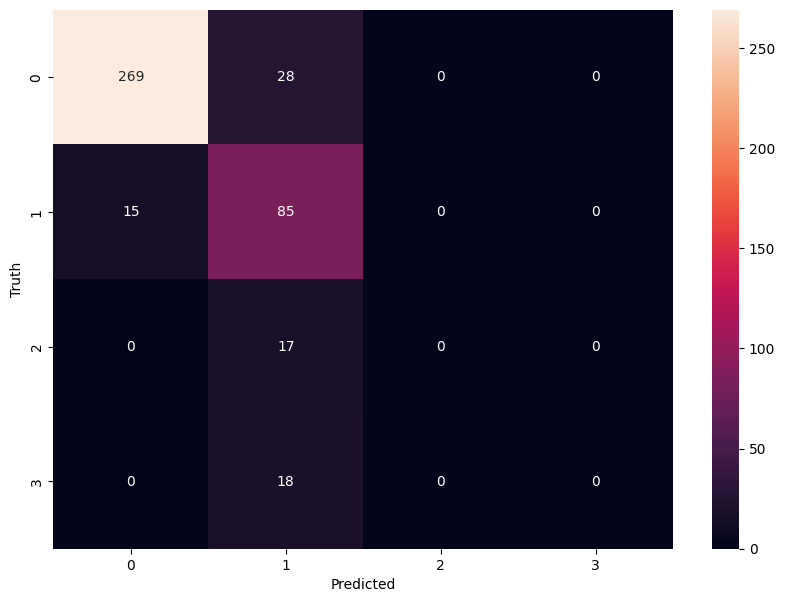

In [115]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [116]:
knnPredictedDF = pd.DataFrame(data = knnPredicted, columns = ["class"])
knnPredictedDF.head(10)

,class
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,0


In [117]:
xTestDF.insert(len(xTestDF.columns), "K-Nearest-Neighbors", knnPredictedDF)
xTestDF.head(20)

,doors,persons,lug_boot,safety,yTest class,Decision Tree,Random Forest,K-Nearest-Neighbors
0,2,2,2,1,0,0,0,0
1,4,6,1,1,0,0,0,0
2,2,4,3,3,3,1,1,1
3,2,4,3,2,0,1,1,1
4,5,4,2,3,0,1,1,1
5,3,2,2,2,0,0,0,0
6,3,4,2,3,1,1,1,1
7,5,2,2,1,0,0,0,0
8,4,6,3,3,1,1,1,1
9,4,2,2,2,0,0,0,0


### Support Vector Machines

In [118]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(xTrain,yTrain)

SVC(random_state=1)

In [119]:
svm_pred = clf.predict(xTest)
print(svm_pred)

[0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0]


In [120]:
svmAccuracy = accuracy_score(yTest,svm_pred)
svmFscore = f1_score(yTest,svm_pred,average = "weighted")
print(f"The accuracy of Support Vector Machines is {svmAccuracy}")
print(f"The F score of Support Vector Machines is {svmFscore}")

The accuracy of Support Vector Machines is 0.8125
The F score of Support Vector Machines is 0.7899662956558337


In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,svm_pred)
cm

array([[265,  32,   0,   0],
       [ 14,  86,   0,   0],
       [  0,  17,   0,   0],
       [  0,  18,   0,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

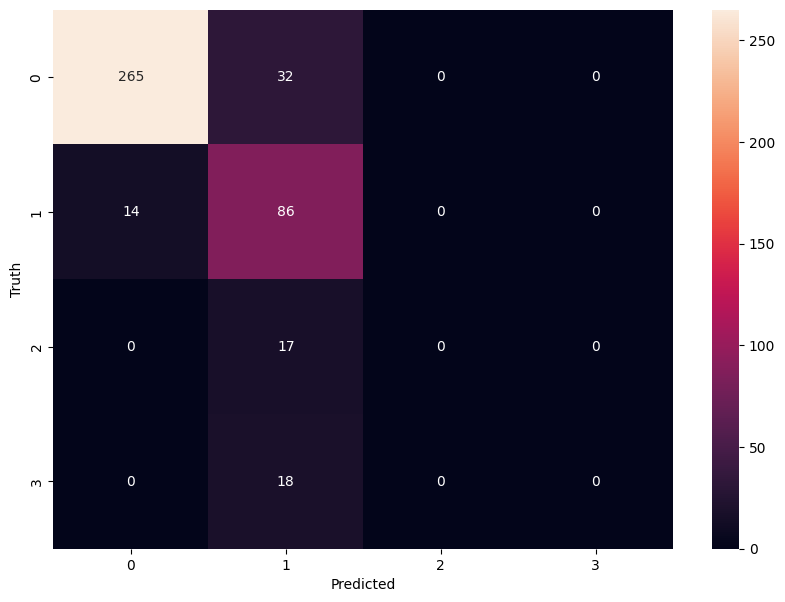

In [122]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [123]:
car_svm_df = pd.DataFrame(data = svm_pred, columns = ["class"])
car_svm_df.head(15)

,class
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,0


In [124]:
xTestDF.insert(len(xTestDF.columns), "Support Vector Machines", car_svm_df)
xTestDF.head(20)

,doors,persons,lug_boot,safety,yTest class,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines
0,2,2,2,1,0,0,0,0,0
1,4,6,1,1,0,0,0,0,0
2,2,4,3,3,3,1,1,1,1
3,2,4,3,2,0,1,1,1,1
4,5,4,2,3,0,1,1,1,1
5,3,2,2,2,0,0,0,0,0
6,3,4,2,3,1,1,1,1,1
7,5,2,2,1,0,0,0,0,0
8,4,6,3,3,1,1,1,1,1
9,4,2,2,2,0,0,0,0,0


### Neural Network

In [125]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(16,), random_state=1, max_iter = 1000)
clf.fit(xTrain,yTrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [126]:
nn_pred = clf.predict(xTest)
print(nn_pred)

[0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0]


In [127]:
nnAccuracy = accuracy_score(yTest,nn_pred)
nnFscore = f1_score(yTest,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 0.8125
The F score of Neural Network is 0.7899662956558337


In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,nn_pred)
cm

array([[265,  32,   0,   0],
       [ 14,  86,   0,   0],
       [  0,  17,   0,   0],
       [  0,  18,   0,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

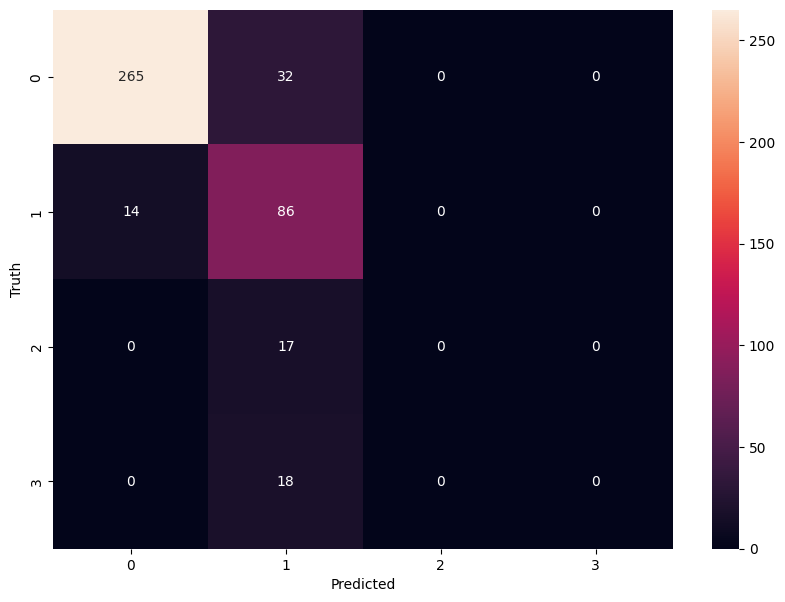

In [129]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [130]:
car_nn_df = pd.DataFrame(data = nn_pred, columns = ["class"])
car_nn_df.head(15)

,class
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,0


In [131]:
xTestDF.insert(len(xTestDF.columns), "Neural Network", car_nn_df)
xTestDF.head(20)

,doors,persons,lug_boot,safety,yTest class,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines,Neural Network
0,2,2,2,1,0,0,0,0,0,0
1,4,6,1,1,0,0,0,0,0,0
2,2,4,3,3,3,1,1,1,1,1
3,2,4,3,2,0,1,1,1,1,1
4,5,4,2,3,0,1,1,1,1,1
5,3,2,2,2,0,0,0,0,0,0
6,3,4,2,3,1,1,1,1,1,1
7,5,2,2,1,0,0,0,0,0,0
8,4,6,3,3,1,1,1,1,1,1
9,4,2,2,2,0,0,0,0,0,0


## Evaluation Metrics of Machine Learning Algorithms

In [132]:
dfMetrics = pd.DataFrame({ "KNN" : [knnAccuracy, knnFscore],
                   "Random Forest" : [rfAccuracy, rfFscore],
                   "Decision Tree" : [dtAccuracy, dtFscore], 
                   "SVM" : [svmAccuracy,svmFscore],
                   "NN" : [nnAccuracy,nnFscore]} , columns = ["KNN" , "Random Forest" , "Decision Tree", "SVM", "NN"], 
                  index = ["Accuracy", "Fscore"])
dfMetrics

,KNN,Random Forest,Decision Tree,SVM,NN
Accuracy,0.819444,0.810185,0.810185,0.812500,0.812500
Fscore,0.795295,0.790939,0.790939,0.789966,0.789966
